In [1]:
import cartopy
import cmocean
from pathlib import Path
from matplotlib import pyplot as plt
import shapely
import xarray as xr

In [2]:
from dask.distributed import Client

In [3]:
client = Client(n_workers=1, threads_per_worker=8, memory_limit=10e9)
client

/opt/tljh/user/envs/parcels-container_2021.03.17-6c459b7/lib/python3.8/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 36237 instead
  warnings.warn(


Client Scheduler: tcp://127.0.0.1:41857 Dashboard: /user/wrath/proxy/36237/status,Cluster Workers: 1 Cores: 8 Memory: 10.00 GB


In [4]:
# parameters
data_path = "/data/spg_fresh_blob_202104_data/raw/"

use_number_subset_years = 3  # use first three years
use_number_full_years = 1 # only use one year

In [5]:
data_stores_subsets = list(sorted(Path(data_path).glob("*_????_subset.zarr/")))[:use_number_subset_years]
data_stores_full_years = list(sorted(Path(data_path).glob("*_????.zarr/")))[:use_number_full_years]

In [6]:
display(data_stores_subsets)

[PosixPath('/data/spg_fresh_blob_202104_data/raw/tracks_randomvel_mxl_osnap_backwards_1990_subset.zarr'),
 PosixPath('/data/spg_fresh_blob_202104_data/raw/tracks_randomvel_mxl_osnap_backwards_1991_subset.zarr'),
 PosixPath('/data/spg_fresh_blob_202104_data/raw/tracks_randomvel_mxl_osnap_backwards_1992_subset.zarr')]

In [7]:
display(data_stores_full_years)

[PosixPath('/data/spg_fresh_blob_202104_data/raw/tracks_randomvel_mxl_osnap_backwards_2016.zarr')]

In [8]:
ds_subsets = xr.concat(
    [xr.open_zarr(store) for store in data_stores_subsets],
    dim="traj",
)

display(ds_subsets)
print(ds_subsets.nbytes / 1e9, "GiB")

<xarray.Dataset>
Dimensions:  (obs: 731, traj: 1200000)
Dimensions without coordinates: obs, traj
Data variables:
    lat      (traj, obs) float32 dask.array<chunksize=(6000, 731), meta=np.ndarray>
    lon      (traj, obs) float32 dask.array<chunksize=(6000, 731), meta=np.ndarray>
    mxl      (traj, obs) float32 dask.array<chunksize=(6000, 731), meta=np.ndarray>
    salt     (traj, obs) float32 dask.array<chunksize=(6000, 731), meta=np.ndarray>
    temp     (traj, obs) float32 dask.array<chunksize=(6000, 731), meta=np.ndarray>
    time     (traj, obs) datetime64[ns] dask.array<chunksize=(12500, 23), meta=np.ndarray>
    uvel     (traj, obs) float32 dask.array<chunksize=(6000, 731), meta=np.ndarray>
    vvel     (traj, obs) float32 dask.array<chunksize=(6000, 731), meta=np.ndarray>
    z        (traj, obs) float32 dask.array<chunksize=(6000, 731), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        2.2.2

35.088 GiB


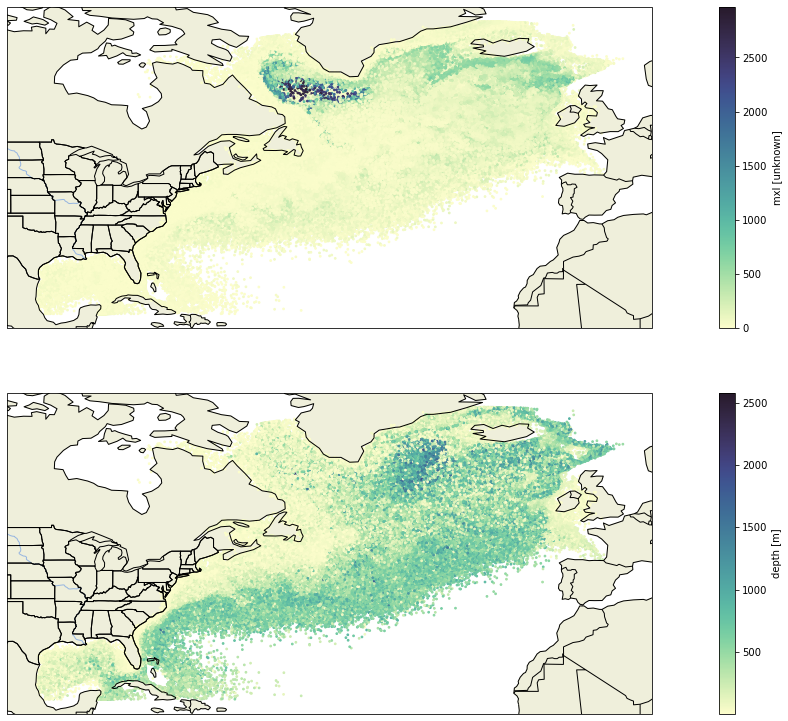

In [9]:
fig, ax = plt.subplots(
    2, 1, figsize=(24, 13),
    sharex=True,
    subplot_kw={"projection": cartopy.crs.PlateCarree()}
)

ds_subsets.isel(obs=123).plot.scatter(
    x="lon", y="lat", hue="mxl", s=3,
    cmap=cmocean.cm.deep,
    ax=ax[0],
    transform=cartopy.crs.PlateCarree()
)

ds_subsets.isel(obs=123).plot.scatter(
    x="lon", y="lat", hue="z", s=3,
    cmap=cmocean.cm.deep,
    ax=ax[1],
    transform=cartopy.crs.PlateCarree()
)

for _ax in ax.flat:
    _ax.coastlines()
    _ax.add_feature(cartopy.feature.LAND)
    _ax.add_feature(cartopy.feature.BORDERS)
    _ax.add_feature(cartopy.feature.RIVERS)
    _ax.add_feature(cartopy.feature.STATES);